## Machine Algorithm for Predecting House Rates - Linear Regression

In [1]:
## Importing Libraries for Data reading and Preprocessing

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [62]:
## Using Data set(CSV file) using Pandas Library

data = pd.read_csv('C:\\Users\\theja\\OneDrive\\Desktop\\Data_sets\\USA_Housing.csv')

In [63]:
data.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [64]:
data.shape

(5000, 7)

In [65]:
data.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [67]:
data.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

In [68]:
data.corr()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
Avg. Area Income,1.000000,-0.002007,-0.011032,0.019788,-0.016234,0.639734
Avg. Area House Age,-0.002007,1.000000,-0.009428,0.006149,-0.018743,0.452543
Avg. Area Number of Rooms,-0.011032,-0.009428,1.000000,0.462695,0.002040,0.335664
Avg. Area Number of Bedrooms,0.019788,0.006149,0.462695,1.000000,-0.022168,0.171071
Area Population,-0.016234,-0.018743,0.002040,-0.022168,1.000000,0.408556
Price,0.639734,0.452543,0.335664,0.171071,0.408556,1.000000


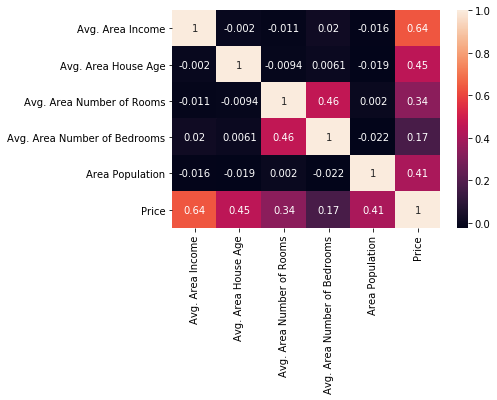

In [69]:
## Ploting the Correlation Matrix
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [70]:
## spliting train_test_data set

In [71]:
X = data.iloc[:,:5]
print(X.head())

   Avg. Area Income  Avg. Area House Age  Avg. Area Number of Rooms  \
0      79545.458574             5.682861                   7.009188   
1      79248.642455             6.002900                   6.730821   
2      61287.067179             5.865890                   8.512727   
3      63345.240046             7.188236                   5.586729   
4      59982.197226             5.040555                   7.839388   

   Avg. Area Number of Bedrooms  Area Population  
0                          4.09     23086.800503  
1                          3.09     40173.072174  
2                          5.13     36882.159400  
3                          3.26     34310.242831  
4                          4.23     26354.109472  


In [72]:
y = pd.DataFrame(data.iloc[:,-2])
print(y.head())

          Price
0  1.059034e+06
1  1.505891e+06
2  1.058988e+06
3  1.260617e+06
4  6.309435e+05


In [73]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import ShuffleSplit

In [74]:
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size = 0.33, random_state = 42)

In [75]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape, 

((3350, 5), (1650, 5), (3350, 1), (1650, 1))

In [76]:
linear_model = LinearRegression()

In [77]:
linear_model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [78]:
linear_model.intercept_

array([-2638142.11043097])

In [79]:
linear_model.coef_

array([[2.15898874e+01, 1.66102501e+05, 1.19895936e+05, 1.90107101e+03,
        1.52315025e+01]])

In [80]:
y_pred = linear_model.predict(X_test)
y_pred = pd.DataFrame(y_pred, columns=['Y_pred'])
print(y_pred)

            Y_pred
0     1.310036e+06
1     1.238812e+06
2     1.245266e+06
3     1.229443e+06
4     1.059067e+06
...            ...
1645  1.379440e+06
1646  1.242676e+06
1647  1.024497e+06
1648  1.548582e+06
1649  1.032639e+06

[1650 rows x 1 columns]


In [81]:
from sklearn.metrics import mean_squared_error
from math import sqrt

In [82]:
result = sqrt(mean_squared_error(y_pred,y_test))
print(result)

100068.37651617707


In [83]:
from sklearn.metrics import r2_score

In [84]:
r2_scores = r2_score(y_pred,y_test)

In [85]:
r2_scores

0.9093158361556868